# Example of Map with basemap

### <font color='red'> Global 2D plot for apparent stress distribution </font>
### <font color='red'> Earthquake distribution for 4d with Map </font>

### - Color code
https://matplotlib.org/examples/color/named_colors.html


## -Global map
### how to use basemap function
https://matplotlib.org/basemap/api/basemap_api.html

<IPython.core.display.Javascript object>


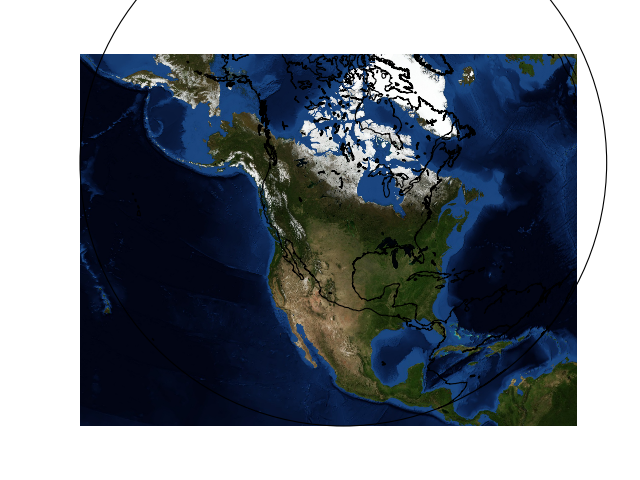

In [1]:
%matplotlib notebook
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

#### -with Satellite image

<IPython.core.display.Javascript object>


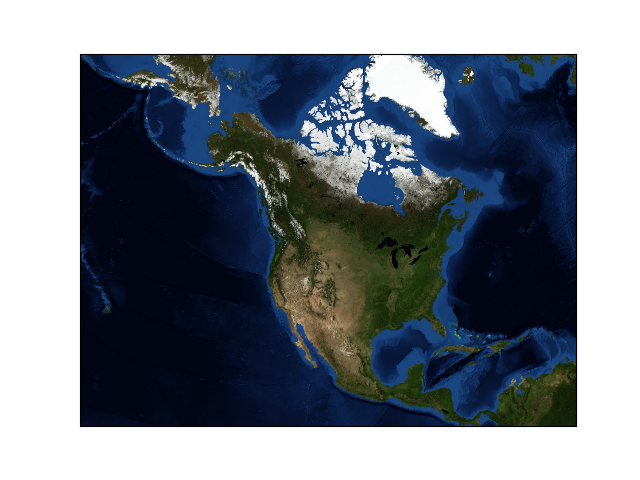

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

#### -with Topography

<IPython.core.display.Javascript object>


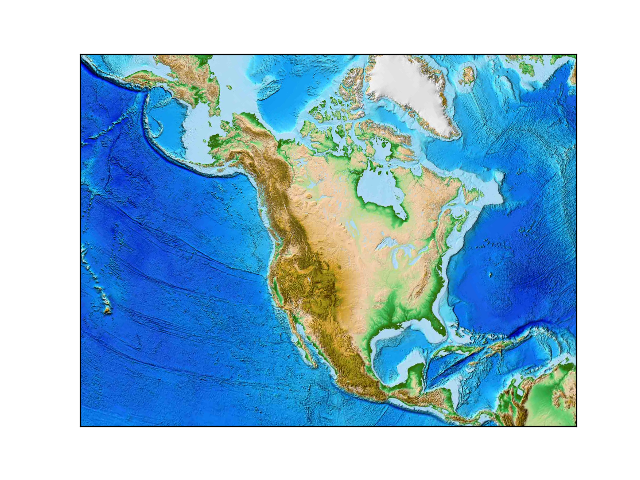

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.etopo()
plt.show()

#### - Saudi Map with Mercator projection

<IPython.core.display.Javascript object>


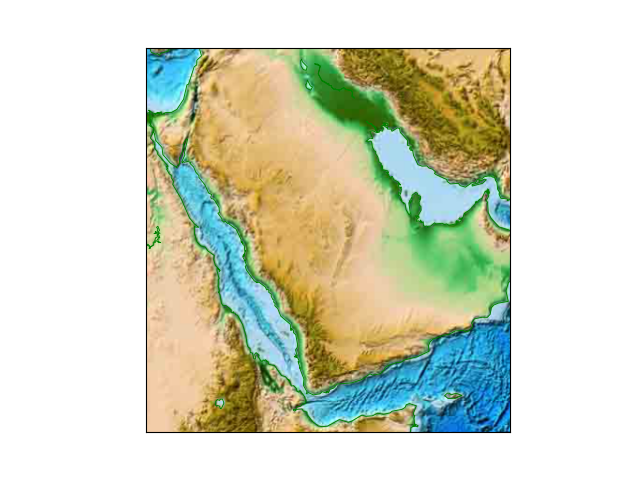

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(projection='merc',llcrnrlat=10,urcrnrlat=35,\
            llcrnrlon=32,urcrnrlon=58,lat_ts=20,resolution='l')
m.drawcoastlines(linewidth=0.8, color='g')
m.etopo()
plt.show()

#### - with ArcGIS image 
### <font color='red'> You have to connect network!! </font>

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=32.0,10.0,58.00000000000001,35.0&bboxSR=4326&imageSR=4326&size=1500,1442&dpi=96&format=png32&f=image


<IPython.core.display.Javascript object>


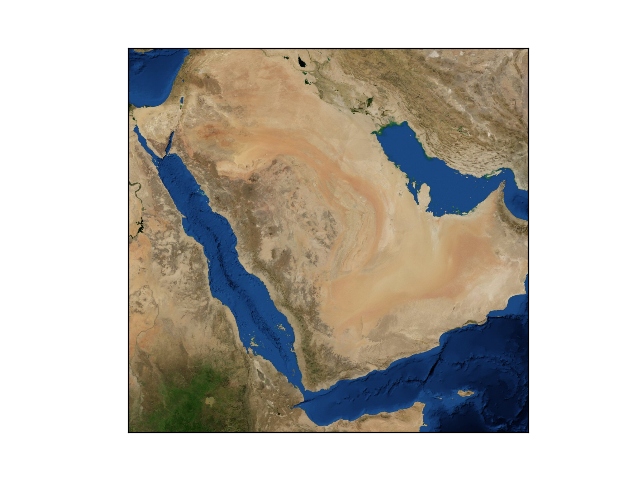

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=32,llcrnrlat=10,urcrnrlon=58,urcrnrlat=35)
#http://server.arcgisonline.com/arcgis/rest/services

map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
plt.show()

#### - Relief Image

In [7]:
map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
plt.show()


http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=32.0,10.0,58.00000000000001,35.0&bboxSR=4326&imageSR=4326&size=1500,1442&dpi=96&format=png32&f=image


<IPython.core.display.Javascript object>

### - Plotting the data (Scatter plot)

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=32.0,10.0,58.00000000000001,35.0&bboxSR=4326&imageSR=4326&size=1500,1442&dpi=96&format=png32&f=image


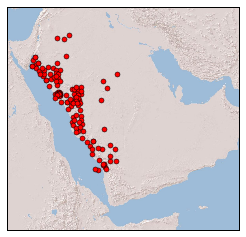

In [8]:
import pandas as pd
import matplotlib.cm as cm

data = pd.read_csv('Ranef_st.csv')
#print (data)       # show all column
#print (data['Station'])  # show 'A' column

lon = data['Stlon']
lat = data['Stlat']
Ranef_PGA = data['Ranef_PGA']
Ranef_PGV = data['Ranef_PGV']

map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
x, y = map(lon, lat)

map.plot(x, y, 'ro', markersize=5)

plt.show()

### - Add color scale
Checking default color palette at
http://matplotlib.org/examples/color/colormaps_reference.html

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=32.0,10.0,58.00000000000001,35.0&bboxSR=4326&imageSR=4326&size=1500,1442&dpi=96&format=png32&f=image


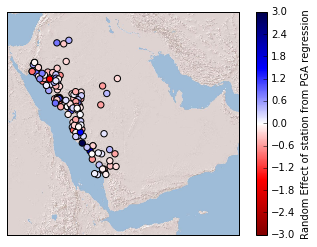

In [9]:
import matplotlib.cm as cm

map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

# Add color scale
colors = cm.seismic
#colors = cm.get_cmap('seismic_r')     # For inverse color palette

map.scatter(x,y, s=40, c=Ranef_PGA, cmap=colors)

# Add colorbar
cb = plt.colorbar(label='Random Effect of station from PGA regression', 
                 orientation = 'vertical')
#cb.ax.invert_yaxis()     #Inverse of color bar


# Set the colorbar range
plt.clim(-3,3)
plt.show()